In [7]:
import torch, torchvision, matplotlib
from torchvision import datasets
from torchvision.transforms import ToTensor

In [9]:
train_data = datasets.MNIST(
    root= 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data =  datasets.MNIST(
    root= 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
train_data.data.size() #shape we can use

torch.Size([60000, 28, 28])

In [13]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [14]:
train_data.targets.size()

torch.Size([60000])

In [15]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [16]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers=1),

    'test' : DataLoader(test_data,
                       batch_size = 100,
                       shuffle = True,
                       num_workers = 1),
}



In [17]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1a8a2a24b60>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1a8981c2a80>}

In [18]:
#neural network structure
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training = self.training)
        x = self.fc2(x)


        return F.softmax(x)


In [31]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch}
            [{batch_idx * len(data)}/{len(loaders["train"].dataset)} 
            ({100. * batch_idx/ len(loaders["train"]): .0f}%)]
            \t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss +=loss_fn(output, target).item()
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f'\n Test set: Average loss: {test_loss:.4f},
    Accuracy{correct}/{len(loaders["test"].dataset)}
    ({100. *correct / len(loaders["test"].dataset):.0f}%\n)')




In [32]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 ( 0%)]	2.302170
Train Epoch: 1 [2000/60000 ( 3%)]	2.283898
Train Epoch: 1 [4000/60000 ( 7%)]	2.208418
Train Epoch: 1 [6000/60000 ( 10%)]	2.041090
Train Epoch: 1 [8000/60000 ( 13%)]	1.966093
Train Epoch: 1 [10000/60000 ( 17%)]	1.901945
Train Epoch: 1 [12000/60000 ( 20%)]	1.773671
Train Epoch: 1 [14000/60000 ( 23%)]	1.784483
Train Epoch: 1 [16000/60000 ( 27%)]	1.801401
Train Epoch: 1 [18000/60000 ( 30%)]	1.819191
Train Epoch: 1 [20000/60000 ( 33%)]	1.697757
Train Epoch: 1 [22000/60000 ( 37%)]	1.656729
Train Epoch: 1 [24000/60000 ( 40%)]	1.671273
Train Epoch: 1 [26000/60000 ( 43%)]	1.664786
Train Epoch: 1 [28000/60000 ( 47%)]	1.691646
Train Epoch: 1 [30000/60000 ( 50%)]	1.623633
Train Epoch: 1 [32000/60000 ( 53%)]	1.634607
Train Epoch: 1 [34000/60000 ( 57%)]	1.712776
Train Epoch: 1 [36000/60000 ( 60%)]	1.671515
Train Epoch: 1 [38000/60000 ( 63%)]	1.592489
Train Epoch: 1 [40000/60000 ( 67%)]	1.602766
Train Epoch: 1 [42000/60000 ( 70%)]	1.650831
Train Epoch: 1 [44000

prediction: 9


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


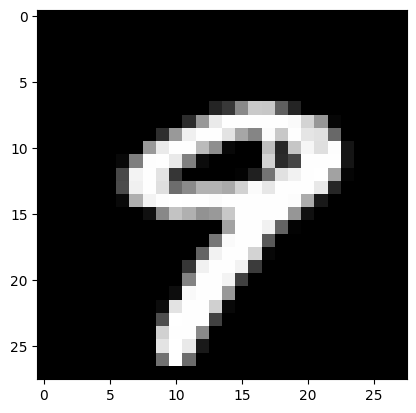

In [35]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

prediction: 2


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


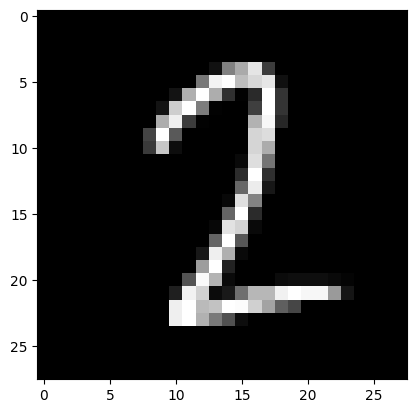

In [36]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[456]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

prediction: 7


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


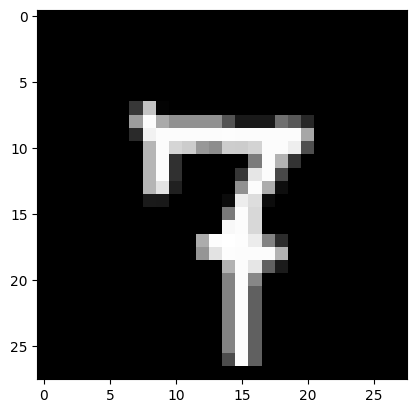

In [37]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[987]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

prediction: 3


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


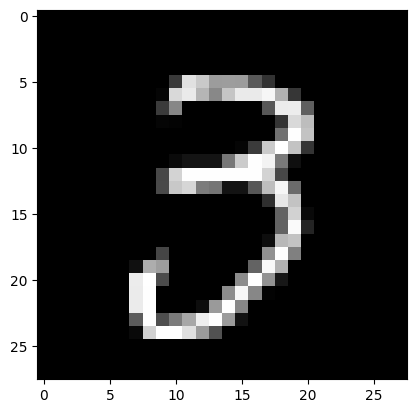

In [38]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[369]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

prediction: 0


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


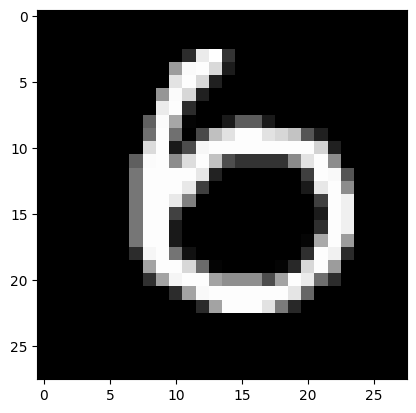

In [39]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[259]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

prediction: 7


C:\Users\kalya\AppData\Local\Temp\ipykernel_10420\698095921.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


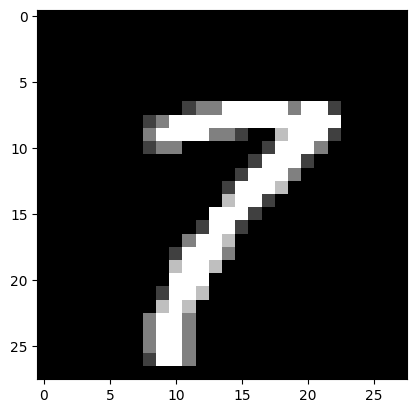

In [40]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[853]

data = data.unsqueeze(0).to(device)
output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()